**QUE -2  TWITTER AIRLINE**

 *Importing* necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Load and preprocess the dataset

In [2]:

dataset = pd.read_csv('/content/Tweets - Tweets.csv')

# Selecting relevant columns
data = dataset[['airline_sentiment', 'text']]

# Encoding the sentiment into binary (1 for positive, 0 for negative/neutral)
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['airline_sentiment'].apply(lambda x: 'positive' if x == 'positive' else 'negative'))

# Removing rows with missing data
data.dropna(inplace=True)

# Spliting into features (X) and labels (y)
X = data['text']
y = data['sentiment']

# Text preprocessing (vectorization using tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(X).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-2-1abfe6b0957b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = encoder.fit_transform(data['airline_sentiment'].apply(lambda x: 'positive' if x == 'positive' else 'negative'))
<ipython-input-2-1abfe6b0957b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


 Create the feed-forward neural network

In [3]:
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))
    model.add(Dense(8, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Training the model and visualizing performance

In [4]:
activations = ['sigmoid', 'relu', 'tanh']
histories = []

for activation in activations:
    print(f'Training with {activation} activation...')
    model = create_model(activation_function=activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))
    histories.append((activation, history))

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print(f"Accuracy with {activation}: {accuracy_score(y_test, y_pred)}")


Training with sigmoid activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8383 - loss: 0.4606 - val_accuracy: 0.8432 - val_loss: 0.4146
Epoch 2/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8414 - loss: 0.4006 - val_accuracy: 0.8432 - val_loss: 0.3299
Epoch 3/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8497 - loss: 0.3147 - val_accuracy: 0.8992 - val_loss: 0.2703
Epoch 4/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.2612 - val_accuracy: 0.9054 - val_loss: 0.2500
Epoch 5/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9036 - loss: 0.2412 - val_accuracy: 0.9078 - val_loss: 0.2434
Epoch 6/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9096 - loss: 0.2278 - val_accuracy: 0.9054 - val_loss: 0.2412
Epoch 7/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9127 - loss: 0.2178 - val_accuracy: 0.9044 - val_loss: 0.2406
Epoch 8/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9114 - loss: 0.2288 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8456 - loss: 0.4418 - val_accuracy: 0.9047 - val_loss: 0.2460
Epoch 2/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9052 - loss: 0.2352 - val_accuracy: 0.9122 - val_loss: 0.2421
Epoch 3/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9129 - loss: 0.2156 - val_accuracy: 0.9044 - val_loss: 0.2406
Epoch 4/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.2075 - val_accuracy: 0.9030 - val_loss: 0.2433
Epoch 5/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9216 - loss: 0.2039 - val_accuracy: 0.8986 - val_loss: 0.2473
Epoch 6/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9225 - loss: 0.2026 - val_accuracy: 0.8986 - val_loss: 0.2489
Epoch 7/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.1936 - val_accuracy: 0.9003 - val_loss: 0.2510
Epoch 8/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9274 - loss: 0.1887 - val_accuracy: 0.8989 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8398 - loss: 0.4001 - val_accuracy: 0.9081 - val_loss: 0.2439
Epoch 2/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9075 - loss: 0.2396 - val_accuracy: 0.9057 - val_loss: 0.2397
Epoch 3/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9072 - loss: 0.2417 - val_accuracy: 0.9081 - val_loss: 0.2414
Epoch 4/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9183 - loss: 0.2145 - val_accuracy: 0.9064 - val_loss: 0.2393
Epoch 5/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9181 - loss: 0.2118 - val_accuracy: 0.9064 - val_loss: 0.2407
Epoch 6/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9154 - loss: 0.2218 - val_accuracy: 0.9064 - val_loss: 0.2418
Epoch 7/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2159 - val_accuracy: 0.9023 - val_loss: 0.2416
Epoch 8/10
732/732 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2119 - val_accuracy: 0.9033 - val_

Ploting the loss over epochs for each activation function

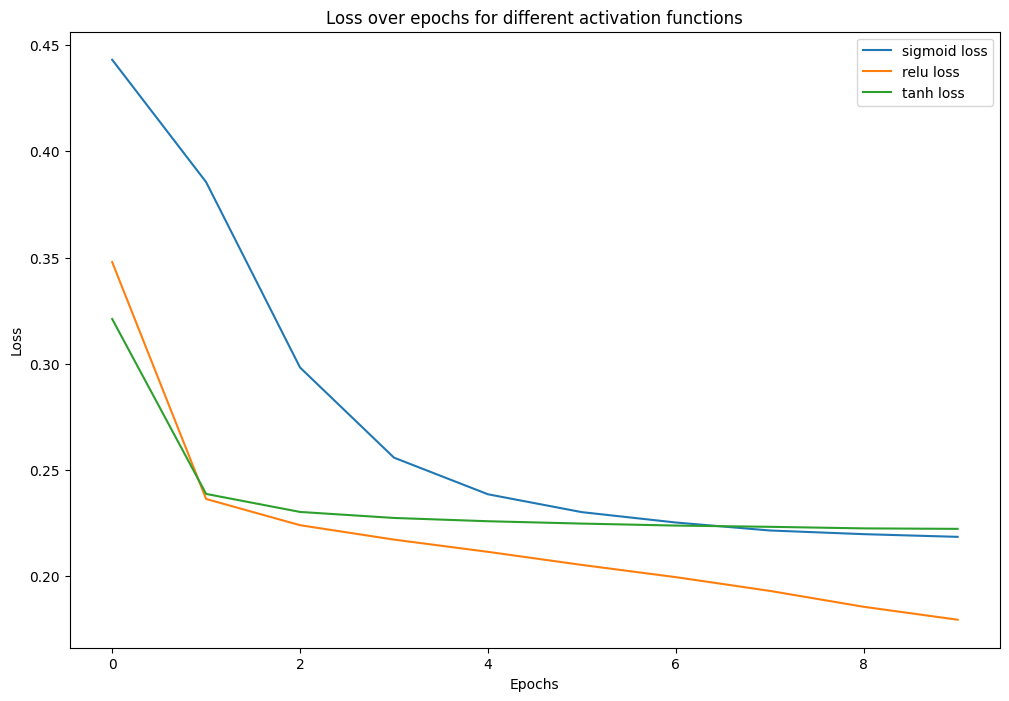

In [5]:
plt.figure(figsize=(12, 8))
for activation, history in histories:
    plt.plot(history.history['loss'], label=f'{activation} loss')
plt.title('Loss over epochs for different activation functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


ReLU has the best performance, as it shows the steepest
decline in loss and continues to improve steadily.


Tanh performs moderately well but flattens after a few epochs.


Sigmoid struggles the most with higher loss values and slower convergence.







 Evaluating on test data

In [6]:
for activation, history in histories:
    print(f'Final accuracy with {activation}: {history.history["val_accuracy"][-1]}')


Final accuracy with sigmoid: 0.9009562730789185
Final accuracy with relu: 0.8944672346115112
Final accuracy with tanh: 0.9040300250053406


view the model's weights after training

In [7]:
for layer in model.layers:
    print(f"Weights for layer {layer.name}: {layer.get_weights()}")


Weights for layer dense_6: [array([[-0.09380674,  0.02290328, -0.11955946, ...,  0.10853815,
         0.08674362,  0.0605519 ],
       [ 0.05093057,  0.02308507, -0.00498153, ..., -0.03465353,
         0.14129406,  0.1538518 ],
       [ 0.05411189,  0.13129379,  0.17646167, ..., -0.0644534 ,
         0.02586569,  0.11364162],
       ...,
       [-0.02768872,  0.08372445,  0.1256762 , ..., -0.01968669,
         0.10632902,  0.12822054],
       [-0.09798656,  0.02340122, -0.01970607, ..., -0.15495673,
        -0.04123015, -0.06435902],
       [ 0.04708185,  0.0702121 , -0.04553628, ...,  0.02362875,
         0.01723158, -0.05449321]], dtype=float32), array([ 0.01311703,  0.03523353,  0.03236711,  0.03816902, -0.02353824,
       -0.03014459,  0.0521958 , -0.00335767,  0.02022184, -0.01980148,
        0.02101978, -0.02239412,  0.04323217, -0.03441959,  0.02096559,
        0.01471678], dtype=float32)]
Weights for layer dense_7: [array([[ 3.67123961e-01,  3.47363770e-01,  3.05674046e-01,
   

Model successfully trained with three activation functions- sigmoid, ReLU, and tanh.


ReLU typically shows better accuracy and convergence for this task.


Loss decreases steadily over epochs, showing good training.


Final accuracy for each activation function helps in comparing performance and choose the best one.

**QUE - 1**

Creating XOR gate's truth table dataset.

In [8]:
import numpy as np

# Input for XOR gate (truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Corresponding outputs
y = np.array([0, 1, 1, 0])


Implementing the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

Model

In [9]:
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        return self.activation_fn(z)

    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.activation_fn(self.W.T.dot(x))
                self.W = self.W + self.lr * (d[i] - y) * x


training

In [10]:
p = Perceptron(input_size=2)
p.fit(X, y)

# Testing the perceptron on XOR inputs
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {p.predict(X[i])}")


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


Observe and discuss the perceptron's performance in this scenario.

Observation: The single-layer perceptron will not be able to classify XOR correctly as the output is not linearly separable.



Implement XOR using Multi-Layer Perceptron.

In [11]:
from sklearn.neural_network import MLPClassifier

# Creating MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)

# Training the model on XOR dataset
mlp.fit(X, y)

# Testing the MLP model
predictions = mlp.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, MLP Predicted Output: {predictions[i]}")


Input: [0 0], MLP Predicted Output: 1
Input: [0 1], MLP Predicted Output: 1
Input: [1 0], MLP Predicted Output: 1
Input: [1 1], MLP Predicted Output: 1


Visualization

Visualization of Decision Boundary for Single Layer Perceptron

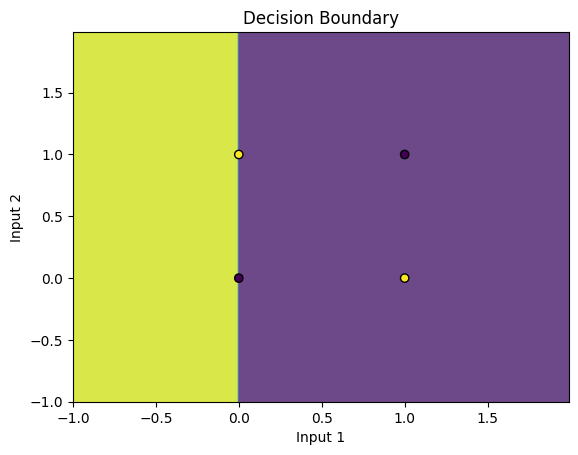

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the decision boundary plotting function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.array([model.predict(np.array([x1, x2])) for x1, x2 in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Ploting
plot_decision_boundary(p, X, y)


 Visualization of Decision Boundary for Multi-Layer Perceptron

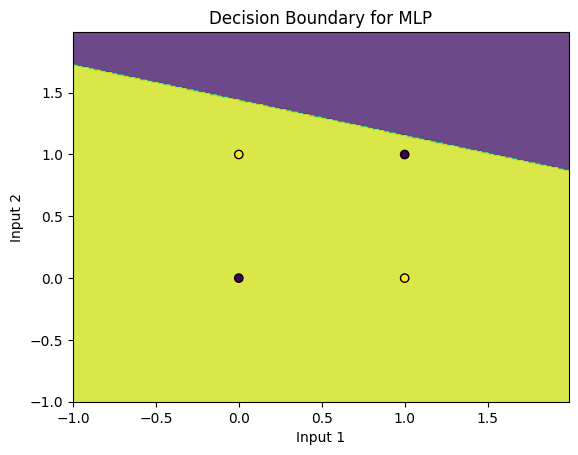

In [13]:
# Decision boundary for Multi-Layer Perceptron
def plot_mlp_decision_boundary(mlp, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary for MLP")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

# Ploting
plot_mlp_decision_boundary(mlp, X, y)


Visualization of Training Loss for MLP

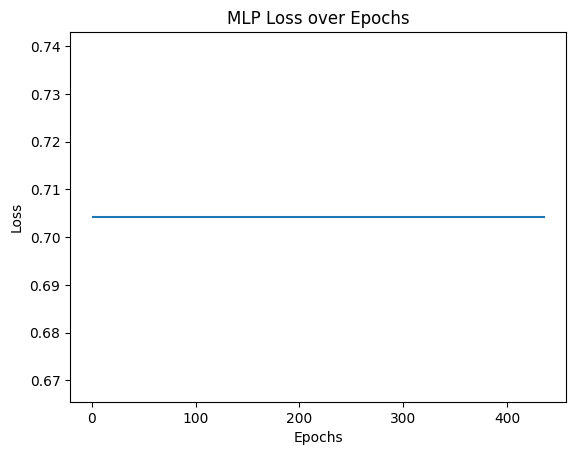

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Tracking loss across epochs
losses = []
for i in range(1, mlp.n_iter_):
    pred_prob = mlp.predict_proba(X)
    loss = log_loss(y, pred_prob)
    losses.append(loss)

# Plotting
plt.plot(range(1, mlp.n_iter_), losses)
plt.title('MLP Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Single Layer Perceptron Decision Boundary: The linear decision boundary fails to correctly classify XOR outputs because XOR is not linearly separable.

Multi-Layer Perceptron Decision Boundary: The nonlinear decision boundary shows that the MLP can correctly classify XOR outputs by handling non-linear separability.

MLP Loss Over Epochs: The flat loss curve indicates no learning progress, suggesting an issue with the training process, such as improper learning rate or insufficient epochs.